
# <center>**Summary and Conclusion**</center>
Finally, after a series of work on the challenge. We would like to summarize and discuss the following points:
- Do our models classify well on human activity recognition data? 
- Exactly which data preprocessing strategy makes more sense to utilize? 
- Do deep learning models perform better than traditional machine learning classification methods?  
- What are the main classification errors?
- Finally which model do we recommend for this task?

# 1 Model performance
## 1.1 Recap metrics and parameters of all four optimal models 

First of all, let's recap our main results from the deep learning and non deep learning modeling.
- With **known** users in testset
    - Both deep learning and non deep learning models performed generally very good on almost all data groups
    - Using as many windows (per record) as possible has not improved the deep learning models performance
    - Using as many windows (per record) as possible has slightly improved the Random Forest models performance


- With **unknown** users in testset 
    - Models performance were much worse than with known users 
    - Using as many windows (per record) as possible has not improved the models performance.
    - Increasing the number of users from six to seven has significantly improved models performance


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
summary = {'model type': ['LSTM-CNN on known users', 'CNN on unknown users','Random Forest on known users','Random Forest on unknown users'],
        'nr of total users': [6, 7, 6, 7],
        'testset type': ['known users','unknown users','known users','unknown users'],
        'accuracy train': [0.9965, 0.9886, 0.998433, 0.996810],
        'accuracy test': [0.9913, 0.604, 0.997378, 0.867521],
        'data group': [8, 17, 14, 18],
        'windows length [s]': [2, 2, 4, 2],
        'overlapping': ['50%', '50%', '50%', '50%'],
        'nr of windows per record': [16, 16, 'max', 'max']}
df = pd.DataFrame(summary)
df['accuracy gap'] = df['accuracy train'] - df['accuracy test']
df = df[['model type', 'testset type', 'accuracy train',
       'accuracy test', 'accuracy gap', 'nr of total users', 'data group', 'windows length [s]', 'overlapping',
       'nr of windows per record']]
df

model type   testset type  accuracy train  \
0         LSTM-CNN on known users    known users        0.996500   
1            CNN on unknown users  unknown users        0.988600   
2    Random Forest on known users    known users        0.998433   
3  Random Forest on unknown users  unknown users        0.996810   

   accuracy test  accuracy gap  nr of total users  data group  \
0       0.991300      0.005200                  6           8   
1       0.604000      0.384600                  7          17   
2       0.997378      0.001055                  6          14   
3       0.867521      0.129289                  7          18   

   windows length [s] overlapping nr of windows per record  
0                   2         50%                       16  
1                   2         50%                       16  
2                   4         50%                      max  
3                   2         50%                      max

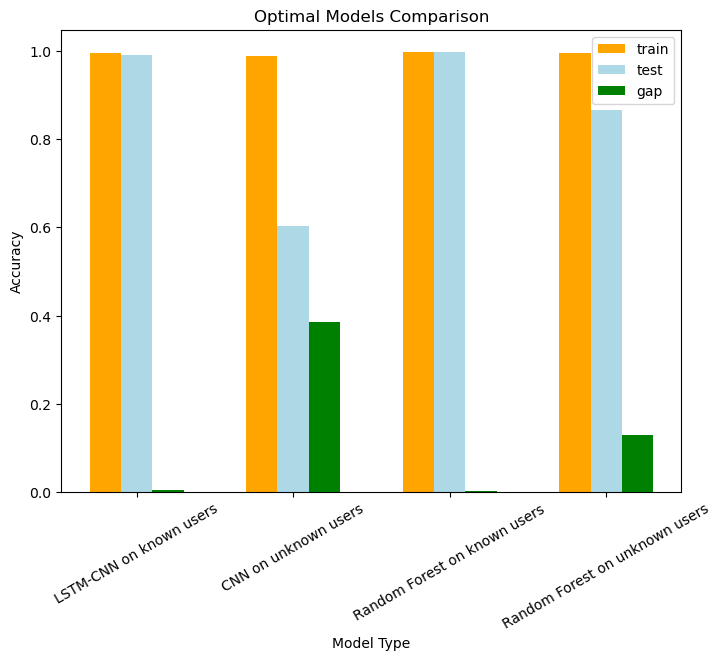

In [2]:
width = 0.2
x = np.arange(len(df['model type']))
plt.figure(figsize=(8, 6))
plt.bar(x - width, df['accuracy train'], width=width, label='accuracy train', color='orange')
plt.bar(x, df['accuracy test'], width=width, label='accuracy test', color='lightblue')
plt.bar(x + width, df['accuracy gap'], width=width, label='accuracy gap', color='green')
plt.xticks(rotation=30)
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Optimal Models Comparison')
plt.xticks(x, df['model type'])
plt.legend(labels=['train','test','gap'])
plt.show()

In the plot we can see the train accurcy, test accurcy and the gap between them, for all the best models. 

## 1.2 Recap the confusion matrices of optimal models to understand the models' weaknesses and main errors

##### <center>**Deep learning models**</center>

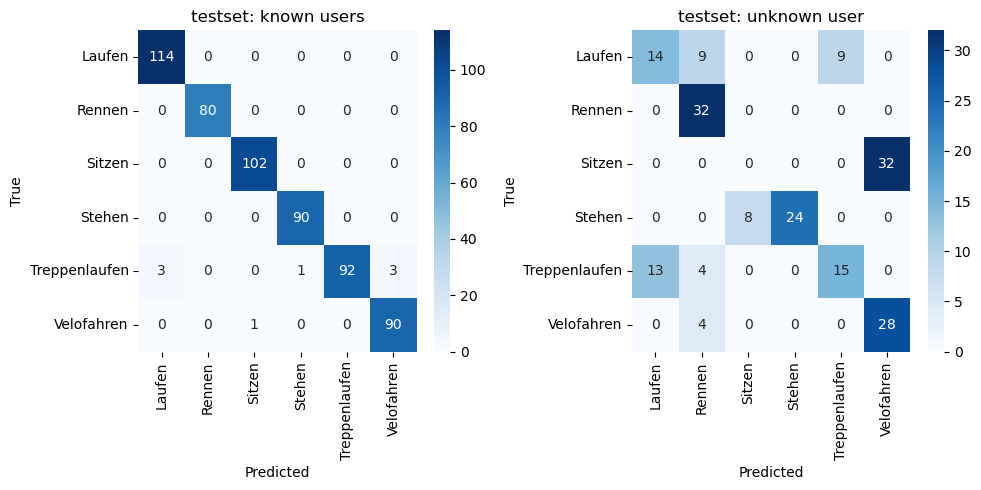

##### <center>**Random Forest models**</center>
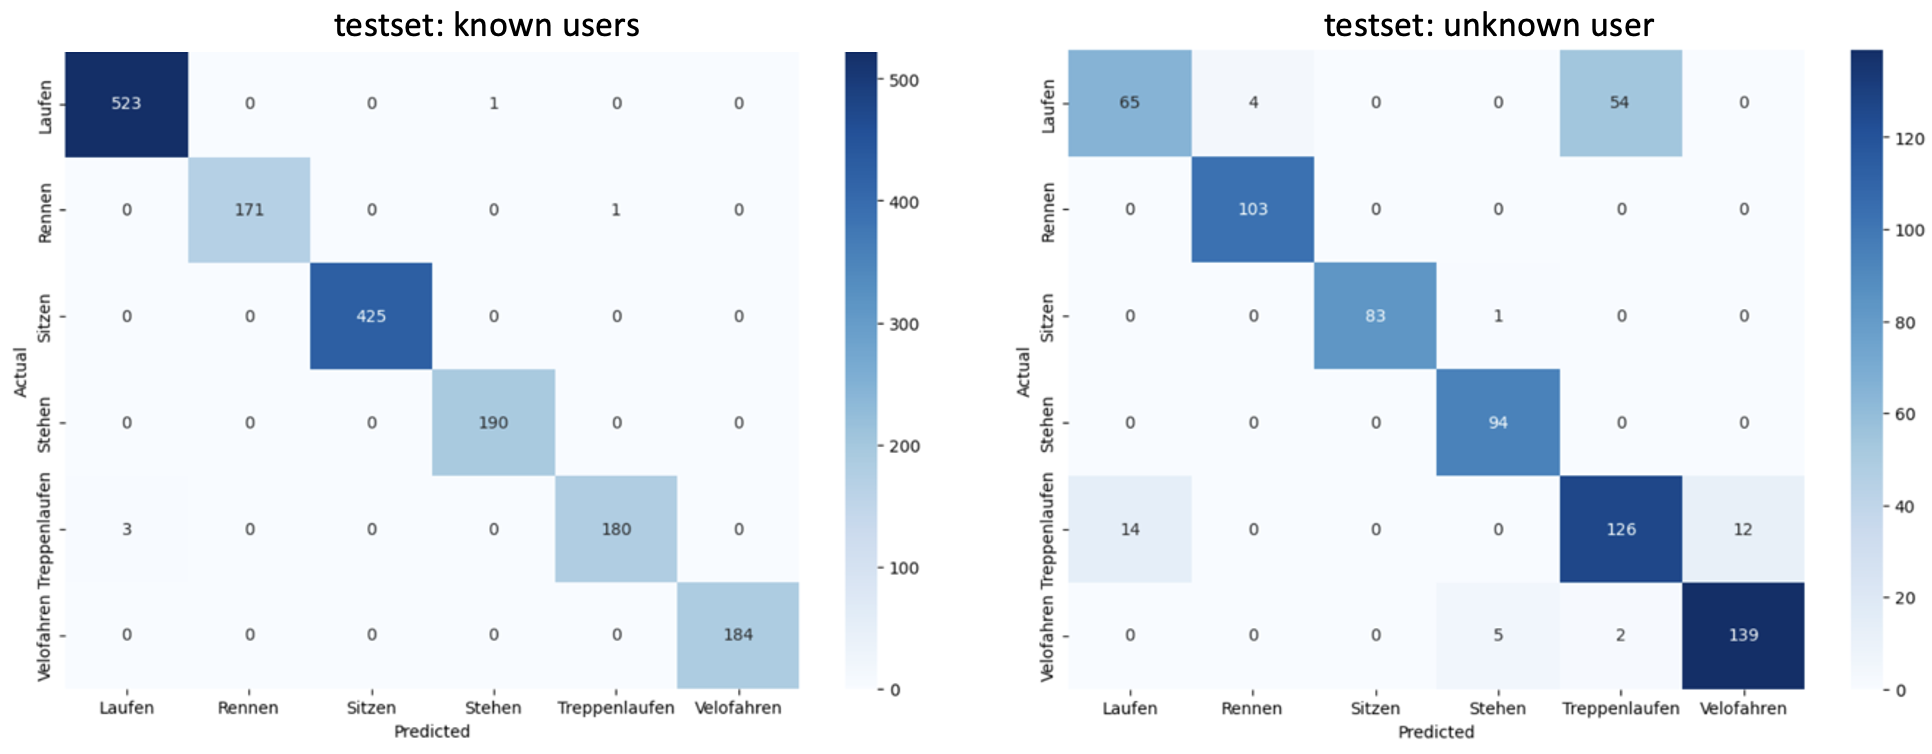

# 2 Compare and interpret four models performance

Let's compare the models in two situations:
1. When we want to classify the activities for the **known users** in testset, 
    - Both Random Forest and LSTM-CNN models have comparable high performance on train and test set, where Random Forest is slightly better.
    - Accuracy gap between train and test accuracies were both very small (under 0.0053), this indicates both models have very good generalization, models are not overfitting. Again, Random Forest is slightly better.
    - Computational time of one LSTM-CNN  model run (training and predicting) is around 15 minutes, where one Random Forest run (training and predicting) is under 5 seconds on the same machine. Random Forest is significantly computational cheaper.
    - There are no main prediction errors, as both have very good prediction on testsets (see the two confusion matrics on left side).

In this condition, **Random Forest model** performs **slightly better** than LSTM-CNN model on classifying the activities from **known users**.

2. When we want to classify the activities for the **unknown users** in testset,
    - Both models have very good performance on trainset.
    - Test accuracy from Random Forest (0.87) is much better than from CNN model (0.60)
    - Accuracy gap by Random Forest is around 0.129, this indicates an overfitting, where by CNN exists even stronger overfitting (0.385)
    - Computational time of one CNN run is around 15 minutes, where one Random Forest run costed less than 5 seconds.
    - Main prediction errors
        - Both models cannot well distinguish 'Laufen' and 'Treppenlaufen'
        - CNN model classified all 'Sitzen' data false as 'Velofahren', and 1/3 of 'Laufen' data as 'Rennen' 
        - We could see, that, Random Forest has only one main error, where CNN model has extra many other classification errors to be improved.
        
In this condition, **Random Forest model** performs **significantly better** than CNN model on classifying the activities from **unknown users**.
# 3 Summary and Conclusion  

Deep learning is widely recognized as a powerful algorithm, but it may not always be the most suitable solution for every case. For our challenge of classifying human activities, **Random Forest model** performed **significantly better** than CNN model on classifying the activities, **regardless of whether the test users were known or unknown**. This could be due to the following factors:
- Higher performance on both train and test dataset (even with small datasize): Random Forest could handle small to moderate-sized datasets more effectively and are less prone to overfitting, while deep learning models usually require a large amount of labeled data to generalize well and achieve high accuracy.
- Better generalization: With Random Forest model, the accuracy gap between train and test dataset is smaller than by deep learning, which indicates a better generalized and less overfitting model.
- Training time and resource efficiency: Random Forest costs significant shorter computational time than deep learning, this will lead to much quicker reaction which is very important for a potential activity APP.
- Interpretable results: With Random Forest, we could analyse the Feature Importance. This can be helpful for us to further improve the Feature Engineering. By recognizing these less relevant features, we can eliminate them from the model, reducing unnecessary computational overhead and improving the responsiveness. 

# 4 Future enhancement

In order to enhance the potential usage of our work in the future, particularly for developing an app to track users' activities, there are several key areas where improvement can be focused:

1. **Improving Test Accuracy:**
   - **Increase the number of users**' activity data for training: By collecting data from more users, the model can learn a wider range of activity patterns, leading to improved accuracy on unknown users.
   - Include **more activity categories**: Expanding the range of activity categories considered by the app will allow for better recognition of diverse user activities, improving the overall accuracy of the system.
   - **Feature Engineering**: Explore and identify additional relevant features that can capture more aspects of human activities. Advanced domain expertise and further analysis of sensor data is needed to extract meaningful features that can contribute to better activity recognition.

2. **Enhancing Reaction Quickness:**
   - Fine-tune **window length**: Minimizing the window length while ensuring it is long enough to maintain accuracy. Shorter windows enable quicker generation of predictions, reducing the reaction time for the app users.
   - Adjust **overlapping rate**: Increasing the overlapping rate of windows allows for shorter waiting time in generating live data predictions. This ensures that users receive activity predictions sooner, enhancing the overall user experience.
   - Optimize the **number of windows per record**: While reducing the number of windows per record can speed up training time, careful consideration should be given to avoid negatively impacting performance. Finding the right balance is crucial to maintain accuracy while achieving quick training.

By addressing these areas of improvement, we can enhance the accuracy of our model on unknown user and reduce the reaction time for activity recognition. These enhancements will be valuable for future applications, such as developing an app for real-time activity tracking and monitoring.

# Literature

1. K. Xia, J. Huang and H. Wang, "LSTM-CNN Architecture for Human Activity Recognition," in IEEE Access, vol. 8, pp. 56855-56866, 2020, doi: 10.1109/ACCESS.2020.2982225.

2. Bulling, A., Blanke, U., & Schiele, B. (2014). A tutorial on human activity recognition using body-worn inertial sensors. ACM Computing Surveys (CSUR), 46(3), 1-33.

3. Yao, L., Torabi, A., & de Vries, A. P. (2017). Deep learning for human activity recognition: A resource-efficient implementation on low-power devices. Proceedings of the ACM Conference on Embedded Networked Sensor Systems (SenSys).

4. Ordóñez, F. J., & Roggen, D. (2016). Deep convolutional and LSTM recurrent neural networks for multimodal wearable activity recognition. Sensors, 16(1), 115.

5. Banos O, Galvez JM, Damas M, Pomares H, Rojas I. Window size impact in human activity recognition. Sensors (Basel). 2014 Apr 9;14(4):6474-99. doi: 10.3390/s140406474. PMID: 24721766; PMCID: PMC4029702.

6. [RandomForestClassifier scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

7. [Support Vector Machine (SVM) Algorithm](https://www.geeksforgeeks.org/support-vector-machine-algorithm/)

8. [Support Vector Machine Classifier scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

9. [Permutation Importance scikit-learn](https://scikit-learn.org/stable/modules/permutation_importance.html#id2)

10. [Permutation Importance towardsdatascience](https://towardsdatascience.com/advanced-permutation-importance-to-explain-predictions-ead7de26eed4#:~:text=As%20a%20general%20reminder%2C%20it,can%20assume%20also%20negative%20values)

11. [Feature Engineering for Time Series Problems](https://featuretools.alteryx.com/en/stable/guides/time_series.html)

12. [Human activity recognition - feature extraction](https://www.kaggle.com/code/derrelldsouza/human-activity-recognition-feature-extraction)

13. [What is Feature Engineering — Importance, Tools and Techniques for Machine Learning](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)

14. [An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

